<a href="https://colab.research.google.com/github/Codewithkaint/LearnGit/blob/main/DogvsCat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [6]:
!kaggle datasets download -d salader/dogs-vs-cats

 98% 1.04G/1.06G [00:06<00:00, 156MB/s]
100% 1.06G/1.06G [00:06<00:00, 165MB/s]


In [7]:
import zipfile
zip_ref=zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [8]:

import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout


In [9]:
train_ds=keras.utils.image_dataset_from_directory(
    directory='/content/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds=keras.utils.image_dataset_from_directory(
    directory="/content/test",
    labels='inferred',
    label_mode="int",
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [10]:
def process(image,label):
  image=tf.cast(image/255,tf.float32)
  return image,label

train_ds=train_ds.map(process)
validation_ds=validation_ds.map(process)

In [11]:
#Create CNN model

model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))


model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))


model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [13]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [14]:
history=model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 82s 108ms/step - loss: 1.3798 - accuracy: 0.5551 - val_loss: 0.6541 - val_accuracy: 0.6062
Epoch 2/10
625/625 [==============================] - 65s 104ms/step - loss: 0.6333 - accuracy: 0.6579 - val_loss: 0.6705 - val_accuracy: 0.6656
Epoch 3/10
625/625 [==============================] - 76s 120ms/step - loss: 0.5760 - accuracy: 0.7067 - val_loss: 0.5350 - val_accuracy: 0.7288
Epoch 4/10
625/625 [==============================] - 85s 134ms/step - loss: 0.5227 - accuracy: 0.7476 - val_loss: 0.5622 - val_accuracy: 0.7258
Epoch 5/10
625/625 [==============================] - 66s 104ms/step - loss: 0.4648 - accuracy: 0.7798 - val_loss: 0.4793 - val_accuracy: 0.7792
Epoch 6/10
625/625 [==============================] - 68s 108ms/step - loss: 0.3951 - accuracy: 0.8127 - val_loss: 0.4562 - val_accuracy: 0.7854
Epoch 7/10
625/625 [==============================] - 68s 107ms/step - loss: 0.3405 - accuracy: 0.8425 - val_loss: 0.4757 - val_ac

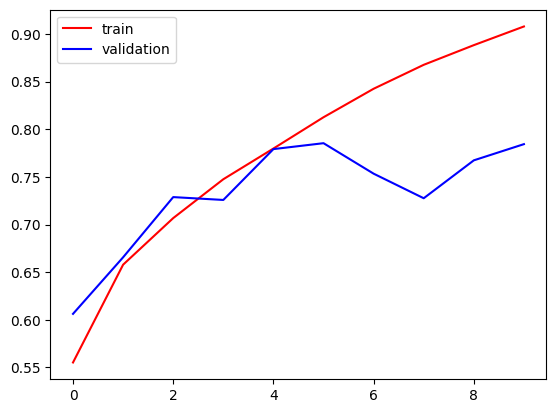

In [17]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

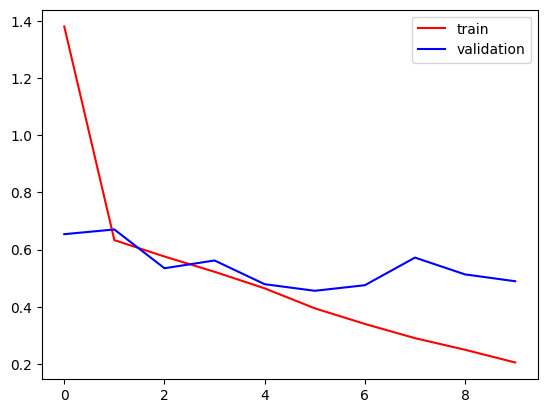

In [19]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [20]:
import cv2

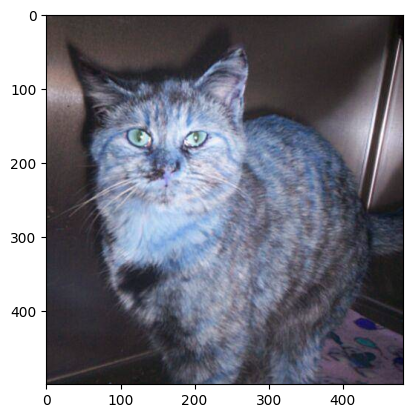

In [33]:
testImg=cv2.imread('/content/cat.jpg')
plt.imshow(testImg)

In [34]:
testImg.shape

(499, 482, 3)

In [35]:
testImg=cv2.resize(testImg,(256,256))

In [36]:
testImg=testImg.reshape((1,256,256,3))
model.predict(testImg)

1/1 [==============================] - 0s 19ms/step


array([[0.99576664]], dtype=float32)